<br>

# Loading Dataset - Add dataset from Add Input Option

<br>

In [1]:
import os

path = "/kaggle/input/brain-tumor-mri-dataset/"
print(os.listdir(path))


['Training', 'Testing']


<br>

# Show main folder → subfolders → sub-subfolders (2 levels only)

<br>

In [3]:
import os

base = "/kaggle/input/brain-tumor-mri-dataset"

for root, dirs, files in os.walk(base):
    level = root.replace(base, '').count(os.sep)
    if level > 1:   # limit to 2 levels
        continue

    print("📁", root)
    
    for d in dirs:
        print("   └──", d)

    print("-" * 40)


📁 /kaggle/input/brain-tumor-mri-dataset
   └── Training
   └── Testing
----------------------------------------
📁 /kaggle/input/brain-tumor-mri-dataset/Training
   └── pituitary
   └── notumor
   └── meningioma
   └── glioma
----------------------------------------
📁 /kaggle/input/brain-tumor-mri-dataset/Testing
   └── pituitary
   └── notumor
   └── meningioma
   └── glioma
----------------------------------------


<brz>

# Analyzing Images

<br>

<br>

### 1. Inspect Images in Brain Tumor MRI Dataset

<br>

In [5]:
import os
from PIL import Image

# Base paths
base_paths = [
    "/kaggle/input/brain-tumor-mri-dataset/Training",
    "/kaggle/input/brain-tumor-mri-dataset/Testing"
]

for base in base_paths:
    print(f"\n🔹 Dataset: {base}\n")
    
    # Loop through categories
    for category in os.listdir(base):
        category_path = os.path.join(base, category)
        if not os.path.isdir(category_path):
            continue
        
        print(f"Category: {category}")
        image_files = os.listdir(category_path)
        print(f"  Total Images: {len(image_files)}")
        
        # For image info, check first image as sample
        if len(image_files) > 0:
            sample_path = os.path.join(category_path, image_files[0])
            with Image.open(sample_path) as img:
                print(f"  Sample Image: {image_files[0]}")
                print(f"  Format: {img.format}")
                print(f"  Mode: {img.mode} (RGB/Grayscale)")
                print(f"  Size (Width x Height): {img.size}")
        print("-" * 40)



🔹 Dataset: /kaggle/input/brain-tumor-mri-dataset/Training

Category: pituitary
  Total Images: 1457
  Sample Image: Tr-pi_0532.jpg
  Format: JPEG
  Mode: RGB (RGB/Grayscale)
  Size (Width x Height): (512, 512)
----------------------------------------
Category: notumor
  Total Images: 1595
  Sample Image: Tr-no_0482.jpg
  Format: JPEG
  Mode: RGB (RGB/Grayscale)
  Size (Width x Height): (225, 225)
----------------------------------------
Category: meningioma
  Total Images: 1339
  Sample Image: Tr-me_0529.jpg
  Format: JPEG
  Mode: RGB (RGB/Grayscale)
  Size (Width x Height): (512, 512)
----------------------------------------
Category: glioma
  Total Images: 1321
  Sample Image: Tr-gl_0954.jpg
  Format: JPEG
  Mode: L (RGB/Grayscale)
  Size (Width x Height): (512, 512)
----------------------------------------

🔹 Dataset: /kaggle/input/brain-tumor-mri-dataset/Testing

Category: pituitary
  Total Images: 300
  Sample Image: Te-pi_0059.jpg
  Format: JPEG
  Mode: RGB (RGB/Grayscale)
  Siz

<br>

### Check min, max, average width/height per category. Count how many images are RGB vs grayscale.

<br>

In [6]:
import os
from PIL import Image
import numpy as np

base = "/kaggle/input/brain-tumor-mri-dataset/Training"

for category in os.listdir(base):
    path = os.path.join(base, category)
    widths, heights = [], []
    modes = {"RGB":0, "L":0}
    
    for img_file in os.listdir(path):
        img_path = os.path.join(path, img_file)
        with Image.open(img_path) as img:
            w, h = img.size
            widths.append(w)
            heights.append(h)
            modes[img.mode] = modes.get(img.mode, 0) + 1
    
    print(f"\nCategory: {category}")
    print(f"  Total Images: {len(widths)}")
    print(f"  Width: min {min(widths)}, max {max(widths)}, avg {np.mean(widths):.1f}")
    print(f"  Height: min {min(heights)}, max {max(heights)}, avg {np.mean(heights):.1f}")
    print(f"  Modes: {modes}")



Category: pituitary
  Total Images: 1457
  Width: min 201, max 1365, avg 509.0
  Height: min 202, max 1365, avg 509.0
  Modes: {'RGB': 760, 'L': 697}

Category: notumor
  Total Images: 1595
  Width: min 150, max 1920, avg 313.9
  Height: min 168, max 1446, avg 320.7
  Modes: {'RGB': 1564, 'L': 27, 'P': 1, 'RGBA': 3}

Category: meningioma
  Total Images: 1339
  Width: min 180, max 1275, avg 493.4
  Height: min 207, max 1427, avg 495.2
  Modes: {'RGB': 791, 'L': 548}

Category: glioma
  Total Images: 1321
  Width: min 512, max 512, avg 512.0
  Height: min 512, max 512, avg 512.0
  Modes: {'RGB': 121, 'L': 1200}


<br>

# Preprocessing and Saving Preprocessed Images to New Folder

<br>

In [7]:
import os
from PIL import Image

base_paths = {
    "Training": "/kaggle/input/brain-tumor-mri-dataset/Training",
    "Testing": "/kaggle/input/brain-tumor-mri-dataset/Testing"
}
save_base = "/kaggle/working/preprocessed_dataset"
target_size = (100, 100) 

for split in base_paths:
    for category in os.listdir(base_paths[split]):
        os.makedirs(os.path.join(save_base, split, category), exist_ok=True)

for split, path in base_paths.items():
    print(f"Processing {split}...")
    for category in os.listdir(path):
        src_folder = os.path.join(path, category)
        dst_folder = os.path.join(save_base, split, category)
        
        for img_file in os.listdir(src_folder):
            src_path = os.path.join(src_folder, img_file)
            dst_path = os.path.join(dst_folder, img_file)
            
            try:
                with Image.open(src_path) as img:
                    img = img.convert("RGB")
                    img = img.resize(target_size)
                    img.save(dst_path)
            except Exception as e:
                print(f"Error processing {img_file}: {e}")
    
    print(f"✅ Done preprocessing {split} images!\n")


Processing Training...
✅ Done preprocessing Training images!

Processing Testing...
✅ Done preprocessing Testing images!



<br>

# Plotting Number of Sample in Each Category

<br>

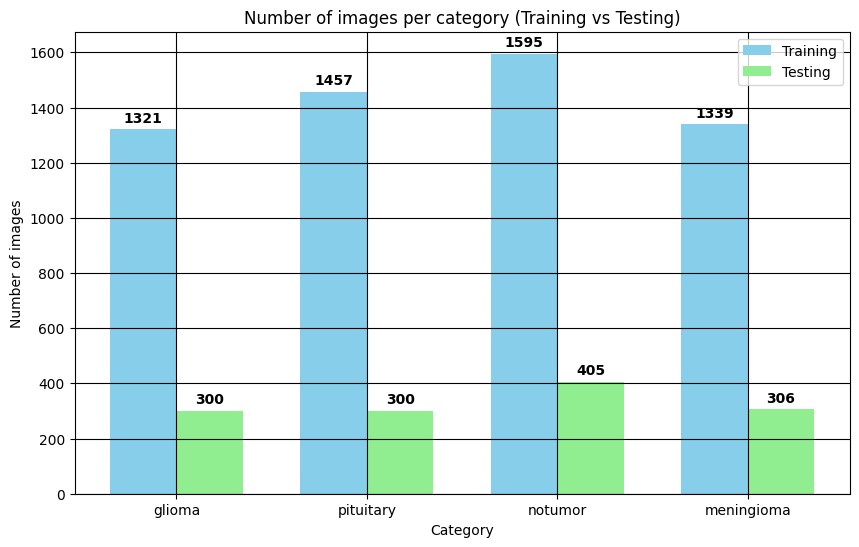

In [8]:
import os
import matplotlib.pyplot as plt
import numpy as np

preprocessed_base = "/kaggle/working/preprocessed_dataset"
splits = ["Training", "Testing"]

categories = os.listdir(os.path.join(preprocessed_base, "Training"))

counts = {split: [] for split in splits}
for split in splits:
    split_path = os.path.join(preprocessed_base, split)
    for category in categories:
        category_path = os.path.join(split_path, category)
        count = len([f for f in os.listdir(category_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
        counts[split].append(count)

x = np.arange(len(categories))
width = 0.35

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - width/2, counts["Training"], width, label='Training', color='skyblue')
rects2 = ax.bar(x + width/2, counts["Testing"], width, label='Testing', color='lightgreen')

# Labels and titles
ax.set_ylabel('Number of images')
ax.set_xlabel('Category')
ax.set_title('Number of images per category (Training vs Testing)')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()
ax.grid(color = 'black')

for rects in [rects1, rects2]:
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontweight='bold')

plt.show()


<br>

# Let's Visualize the images we are working with

<br>


📂 Training Set Samples:




📂 Testing Set Samples:



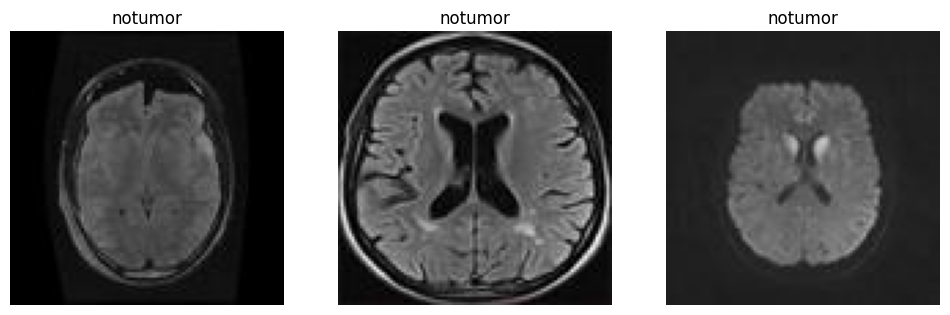

In [9]:
import os
import matplotlib.pyplot as plt
from PIL import Image

base_path = "/kaggle/working/preprocessed_dataset"
splits = ["Training", "Testing"]

samples_per_category = 3

for split in splits:
    print(f"\n📂 {split} Set Samples:\n")
    
    split_path = os.path.join(base_path, split)
    categories = os.listdir(split_path)
    
    for category in categories:
        category_path = os.path.join(split_path, category)
        image_files = [f for f in os.listdir(category_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        
        plt.figure(figsize=(12, 4))
        for i, img_file in enumerate(image_files[:samples_per_category]):
            img_path = os.path.join(category_path, img_file)
            img = Image.open(img_path)
            
            plt.subplot(1, samples_per_category, i+1)
            plt.imshow(img)
            plt.title(f"{category}")
            plt.axis('off')
        
        plt.show()


<br>

## Cropping the images

- Blindly resizing images to 100x100 may remove their important features or little bit part of defected area.
- So instead of Blindly resizing images to 100x100, we will cropp only the defected area part and little bit it's sorroundings so resized images don't loose their important features.

<br>

<br>

# Croping only the defected area part and little bit it's sorroundings

<br>

In [40]:
import os
import cv2
from PIL import Image
import numpy as np

base_paths = {
    "Training": "/kaggle/input/brain-tumor-mri-dataset/Training",
    "Testing": "/kaggle/input/brain-tumor-mri-dataset/Testing"
}
save_base = "/kaggle/working/preprocessed_cropped"
target_size = (224, 224) 

for split in base_paths:
    for category in os.listdir(base_paths[split]):
        os.makedirs(os.path.join(save_base, split, category), exist_ok=True)

def crop_brain_roi(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
    _, thresh = cv2.threshold(img, 10, 255, cv2.THRESH_BINARY)
    
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if len(contours) == 0:
        return None  
    
    c = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(c)
    
    img_color = cv2.imread(img_path)
    crop = img_color[y:y+h, x:x+w]
    
    crop = cv2.resize(crop, target_size)
    
    return crop

for split, path in base_paths.items():
    print(f"Processing {split} set...")
    for category in os.listdir(path):
        src_folder = os.path.join(path, category)
        dst_folder = os.path.join(save_base, split, category)
        
        for img_file in os.listdir(src_folder):
            src_path = os.path.join(src_folder, img_file)
            dst_path = os.path.join(dst_folder, img_file)
            
            try:
                cropped_img = crop_brain_roi(src_path)
                if cropped_img is not None:
                    cv2.imwrite(dst_path, cropped_img)
                else:
                    print(f"⚠️ No contour found for {img_file}")
            except Exception as e:
                print(f"Error processing {img_file}: {e}")
    
    print(f"✅ Done preprocessing {split} images!\n")


Processing Training set...
✅ Done preprocessing Training images!

Processing Testing set...
✅ Done preprocessing Testing images!



<br>

# Side-by-side visualization showing original vs cropped images for Training and Testing, with 2 images per category.

<br>


📂 Training Set: Original vs Cropped Samples



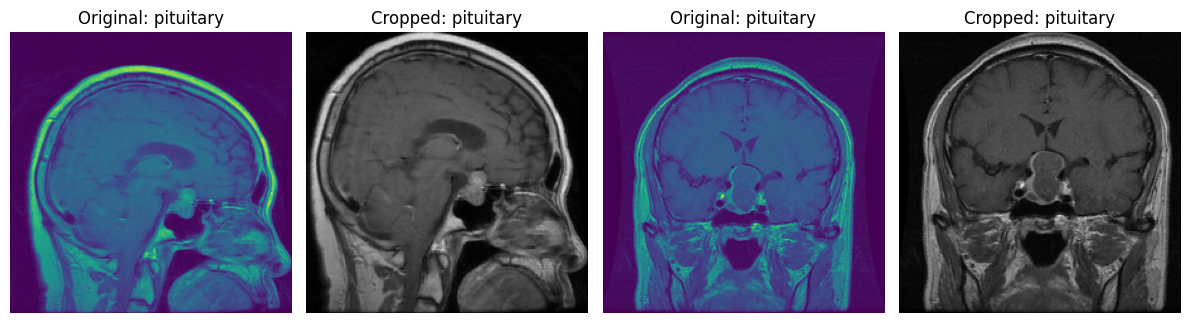

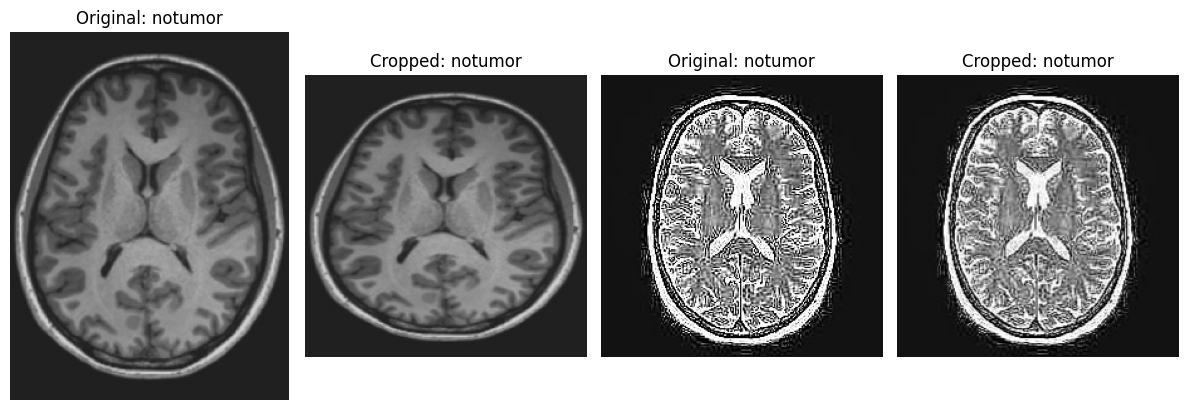

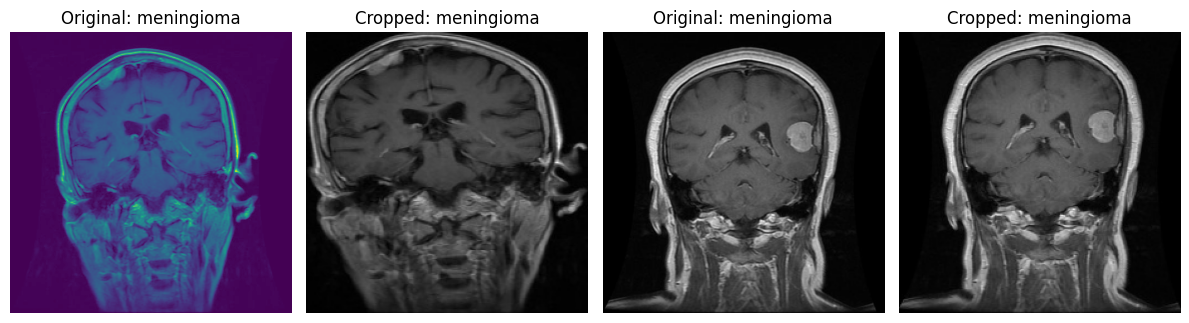

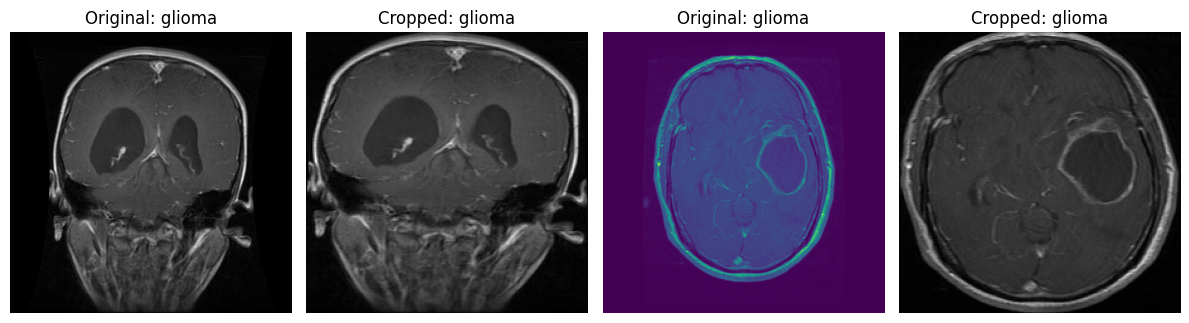


📂 Testing Set: Original vs Cropped Samples



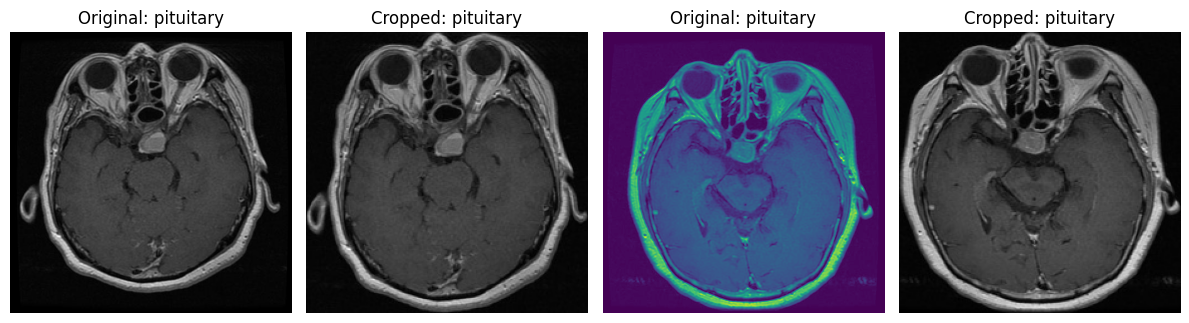

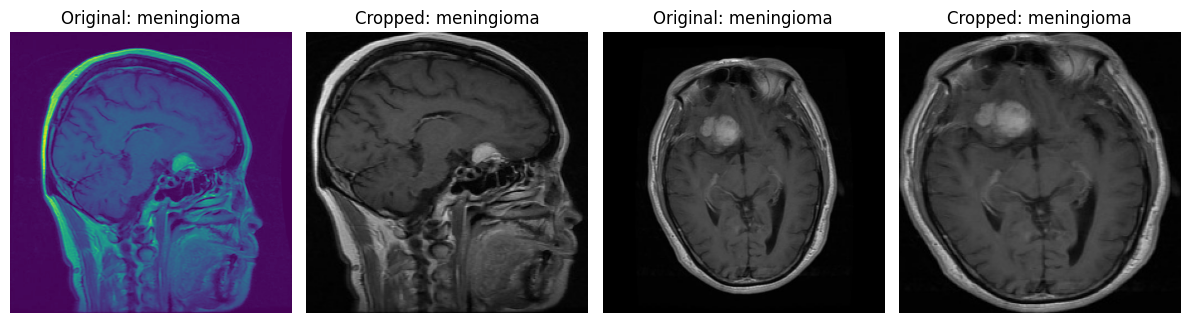

In [41]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import random

original_base = "/kaggle/input/brain-tumor-mri-dataset"
cropped_base = "/kaggle/working/preprocessed_cropped"
splits = ["Training", "Testing"]
samples_per_category = 2  

for split in splits:
    print(f"\n📂 {split} Set: Original vs Cropped Samples\n")
    
    split_original_path = os.path.join(original_base, split)
    split_cropped_path = os.path.join(cropped_base, split)
    
    categories = os.listdir(split_original_path)
    
    for category in categories:
        original_folder = os.path.join(split_original_path, category)
        cropped_folder = os.path.join(split_cropped_path, category)
        
        original_images = [f for f in os.listdir(original_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        
        sampled_files = random.sample(original_images, samples_per_category)
        
        plt.figure(figsize=(12, 4))
        
        for i, img_file in enumerate(sampled_files):

            img_path = os.path.join(original_folder, img_file)
            img = Image.open(img_path)
            plt.subplot(1, samples_per_category*2, i*2 + 1)
            plt.imshow(img)
            plt.title(f"Original: {category}")
            plt.axis('off')
            
            img_path = os.path.join(cropped_folder, img_file)
            img = Image.open(img_path)
            plt.subplot(1, samples_per_category*2, i*2 + 2)
            plt.imshow(img)
            plt.title(f"Cropped: {category}")
            plt.axis('off')
        
        plt.tight_layout()
        plt.show()


<br>

# Data Augmentation

<br>

In [42]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input

train_dir = "/kaggle/working/preprocessed_cropped/Training"
test_dir  = "/kaggle/working/preprocessed_cropped/Testing"

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.1  
)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    subset='training',  
    seed=42
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    subset='validation',  #
    seed=42
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)


Found 5143 images belonging to 4 classes.
Found 569 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


<br>

# Loading ResNet50

<br>

In [58]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

IMG_SIZE = (224, 224)
NUM_CLASSES = 4
LEARNING_RATE = 0.001

base_model = ResNet50(
    weights='imagenet', 
    include_top=False, 
    input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)
)

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)  
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
predictions = Dense(NUM_CLASSES, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(
    optimizer=Adam(learning_rate=LEARNING_RATE),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer_6[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 23,850,500 (90.98 MB)

 Trainable params: 262,788 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

<br>

# Training Model

<br>

In [59]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

EPOCHS = 20
BATCH_SIZE = 32
MODEL_SAVE_PATH = "/kaggle/working/best_resnet50_mri.keras"

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    verbose=1,
    min_lr=1e-6
)

checkpoint = ModelCheckpoint(
    MODEL_SAVE_PATH,
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)


history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=EPOCHS,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[early_stop, reduce_lr, checkpoint]
)


Epoch 1/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step - accuracy: 0.6404 - loss: 1.0047
Epoch 1: val_loss improved from inf to 0.52764, saving model to /kaggle/working/best_resnet50_mri.keras
160/160 ━━━━━━━━━━━━━━━━━━━━ 72s 392ms/step - accuracy: 0.6410 - loss: 1.0028 - val_accuracy: 0.7964 - val_loss: 0.5276 - learning_rate: 0.0010
Epoch 2/20
  1/160 ━━━━━━━━━━━━━━━━━━━━ 18s 114ms/step - accuracy: 0.7812 - loss: 0.7376

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_loss improved from 0.52764 to 0.52185, saving model to /kaggle/working/best_resnet50_mri.keras
160/160 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 0.7812 - loss: 0.7376 - val_accuracy: 0.8000 - val_loss: 0.5218 - learning_rate: 0.0010
Epoch 3/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - accuracy: 0.8147 - loss: 0.4716
Epoch 3: val_loss improved from 0.52185 to 0.46848, saving model to /kaggle/working/best_resnet50_mri.keras
160/160 ━━━━━━━━━━━━━━━━━━━━ 57s 357ms/step - accuracy: 0.8148 - loss: 0.4713 - val_accuracy: 0.8196 - val_loss: 0.4685 - learning_rate: 0.0010
Epoch 4/20
  1/160 ━━━━━━━━━━━━━━━━━━━━ 15s 97ms/step - accuracy: 1.0000 - loss: 0.2055
Epoch 4: val_loss improved from 0.46848 to 0.45908, saving model to /kaggle/working/best_resnet50_mri.keras
160/160 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 1.0000 - loss: 0.2055 - val_accuracy: 0.8268 - val_loss: 0.4591 - learning_rate: 0.0010
Epoch 5/20
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - accuracy: 0.851

<br>

# Classification Report 

<br>

In [60]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

test_generator.reset()  
y_pred_probs = model.predict(test_generator, verbose=1)
y_pred = np.argmax(y_pred_probs, axis=1)

y_true = test_generator.classes

class_labels = list(test_generator.class_indices.keys())

report = classification_report(y_true, y_pred, target_names=class_labels)
print("📊 Classification Report:\n")
print(report)


41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 161ms/step
📊 Classification Report:

              precision    recall  f1-score   support

      glioma       0.94      0.82      0.87       300
  meningioma       0.80      0.78      0.79       306
     notumor       0.95      0.97      0.96       405
   pituitary       0.88      0.98      0.92       300

    accuracy                           0.89      1311
   macro avg       0.89      0.89      0.89      1311
weighted avg       0.89      0.89      0.89      1311



<br>

# Performance Check

<br>

Confusion Matrix:

            glioma  meningioma  notumor  pituitary
glioma         245          47        0          8
meningioma      11         240       22         33
notumor          1          10      394          0
pituitary        4           3        0        293




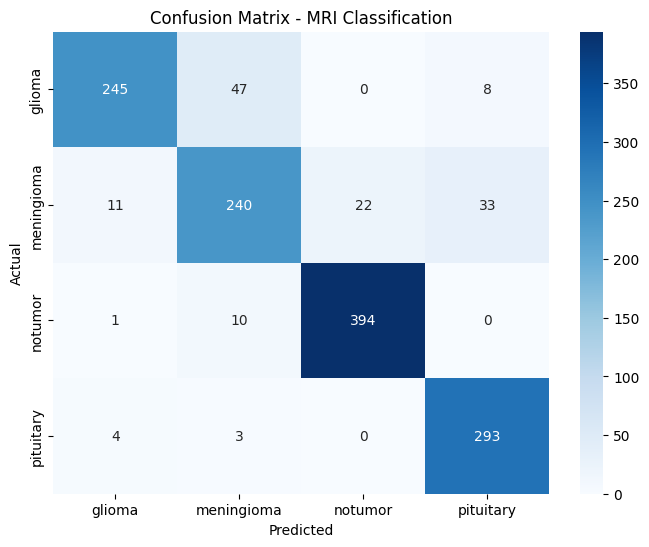

In [61]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd

# Class labels
class_labels = list(test_generator.class_indices.keys())

cm = confusion_matrix(y_true, y_pred)

cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)
print("Confusion Matrix:\n")
print(cm_df)
print('\n')

# Plot
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - MRI Classification')
plt.show()


<br>

# Visualizing Actual vs Predicted labels of Each Category

<br>

In [62]:
print("Class Indices =", test_generator.class_indices)
print("Index → Label =", {v: k for k, v in test_generator.class_indices.items()})


Class Indices = {'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}
Index → Label = {0: 'glioma', 1: 'meningioma', 2: 'notumor', 3: 'pituitary'}


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


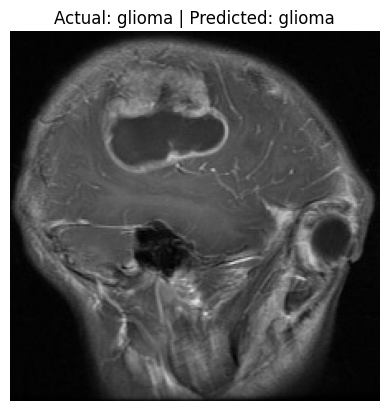

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


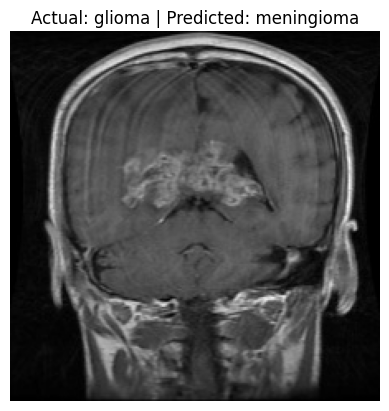

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


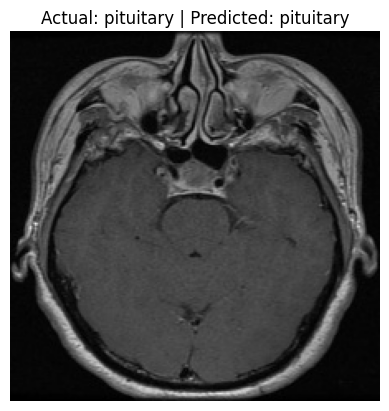

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


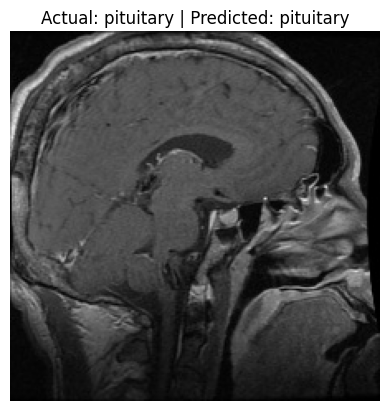

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


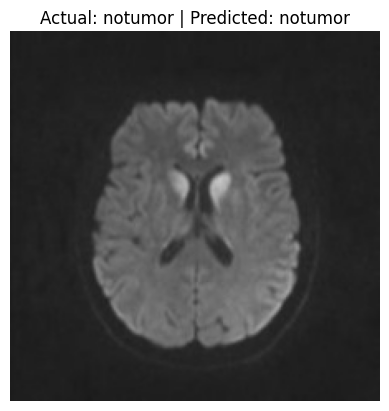

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


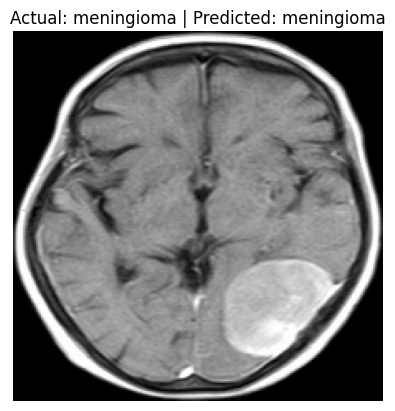

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


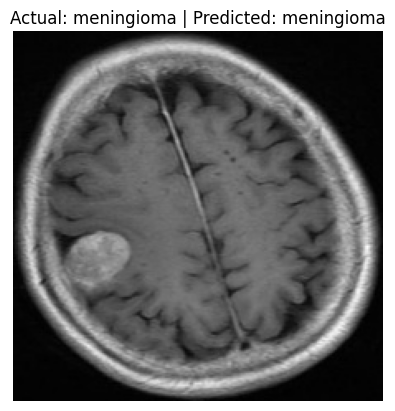

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


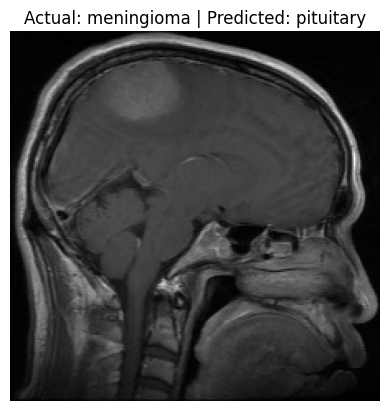

In [63]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input

test_base = "/kaggle/working/preprocessed_cropped/Testing"
categories = os.listdir(test_base)
IMG_SIZE = (224, 224)

def load_and_preprocess(img_path):
    img = image.load_img(img_path, target_size=IMG_SIZE)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)  # ✅ ResNet50 correct preprocessing
    return img_array

for category in categories:
    cat_path = os.path.join(test_base, category)
    sample_images = os.listdir(cat_path)[:3]

    for img_file in sample_images:
        img_path = os.path.join(cat_path, img_file)
        img_array = load_and_preprocess(img_path)

        pred_probs = model.predict(img_array)
        pred_class = np.argmax(pred_probs, axis=1)[0]
        pred_label = {v: k for k, v in test_generator.class_indices.items()}[pred_class]

        plt.imshow(image.load_img(img_path))
        plt.title(f"Actual: {category} | Predicted: {pred_label}")
        plt.axis('off')
        plt.show()


<br>

# Saving Model, Class Indices & History

<br>

In [64]:
model_saved = model.save("final_resnet50_mri.keras")

In [66]:
class_indices = {'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}
import json

with open("class_indices.json", "w") as f:
    json.dump(class_indices, f)


In [67]:
import pickle

with open("history.pkl", "wb") as f:
    pickle.dump(history.history, f)